NOTES:
The main issue here is that we don't know what test to do to compute the differece between a state's ranking vs how the other states rank. (Mann whitney U?)
The last graph looks "promising" but why all values are significant for all states makes no sense. (red vs blue)
Should we look simply whether there is a is statistical difference in average rating for the states? (not just whether it is higher than how other people score it)

Q1: Do Californians prefer Californian beer over non Californians? (Its for all US states but just for question focus purposes)
This question is for BeerAdvocate data which we established before has a lot of data on US states.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu

In [3]:
BA_merged = pd.read_csv('../../minimizedData/Modified/BA_ratbeer.csv')

In [6]:
df_cleaned = BA_merged.dropna(subset=['user_location'])
US_ratings = df_cleaned.dropna(subset=['beer_location'])

#we are only interested in focusing on the ratings that originate from US users AND are for US beers
US_ratings = US_ratings[US_ratings['user_location'].str.startswith('United States,')]
US_ratings = US_ratings[US_ratings['beer_location'].str.startswith('United States,')]

US_ratings.head(3)

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,user_id,appearance,aroma,palate,taste,overall,rating,user_location,avg,beer_location
1008809,1008809,Kupfer Kolsch,289320,Copper State Brewing Company,49595,Kölsch,n2185.211743,2.50,4.00,4.00,3.75,3.75,3.76,"United States, North Carolina",3.76,"United States, Wisconsin"
1008810,1008810,Northwestern Alt,289321,Copper State Brewing Company,49595,Altbier,n2185.211743,3.00,3.75,4.00,3.50,3.50,3.58,"United States, North Carolina",3.58,"United States, Wisconsin"
1008811,1008811,One Cent Wheat,289319,Copper State Brewing Company,49595,Witbier,n2185.211743,3.75,3.25,3.75,3.50,3.50,3.48,"United States, North Carolina",3.48,"United States, Wisconsin"


In [ ]:
#removing the United States part from the location for both beer and user
US_ratings['user_state'] = US_ratings['user_location'].apply(lambda x: x.split(',')[1].strip())
US_ratings['beer_state'] = US_ratings['beer_location'].apply(lambda x: x.split(',')[1].strip())
# Filter rows where either beer_state or user_state is 'United States'
us_rows = US_ratings[(US_ratings['beer_state'] == 'United States') | (US_ratings['user_state'] == 'United States')]
# Remove rows where either beer_state or user_state is 'United States'
US_ratings = US_ratings[
    (US_ratings['beer_state'] != 'United States') & (US_ratings['user_state'] != 'United States')
]
US_ratings = US_ratings.dropna(subset=['rating'])
#need to create a matrix with all the ratings alongs the vertical and the countr

In [ ]:
#This gives the average rating of all users by state for all states
#mean calculated by grouping rankings by user_state and beer_state
state_ratings = US_ratings.groupby(['user_state', 'beer_state'])['avg'].mean().reset_index()
state_ratings.head(5)

,user_state,beer_state,avg
0,Alabama,Alabama,3.842899
1,Alabama,Alaska,3.852717
2,Alabama,Arizona,3.240513
3,Alabama,Arkansas,3.717222
4,Alabama,California,3.991335


In [21]:
#create matrix which gives the avg rating of each beers of state to user of state combination pair
ratings_matrix = state_ratings.pivot_table(index='user_state', columns='beer_state', values='avg')

ratings_matrix.head()

beer_state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
user_state,,,,,,,,,,,,,,,,,,,,,
Alabama,3.842899,3.852717,3.240513,3.717222,3.991335,3.772443,4.045263,3.949393,3.831054,3.831031,...,3.746667,3.765035,3.655649,3.656977,3.801226,3.690347,3.681420,3.747143,3.390454,3.908000
Alaska,3.809091,3.908503,3.763333,3.480000,4.029584,3.872363,4.036000,3.965247,3.948252,3.872750,...,3.587500,3.740000,3.842672,3.915357,4.098214,3.800000,3.825049,3.430000,3.534313,4.104000
Arizona,3.525385,3.874364,3.746851,4.110000,4.007251,3.819866,4.005385,3.941031,4.088136,3.908472,...,3.565294,3.836154,3.731081,3.822427,4.066395,3.978148,3.734930,3.552000,3.589426,4.001538
Arkansas,3.907703,3.908353,3.637818,3.816060,3.989498,3.718907,3.947143,3.969442,3.833161,3.833759,...,3.614286,3.861862,3.647887,3.831846,3.970551,3.790714,3.764634,3.826667,3.378565,3.915714
California,3.821583,3.990581,3.634085,3.871556,3.988740,3.847139,4.042271,3.951923,4.103358,3.931051,...,3.581977,3.826225,3.868088,3.863365,4.250981,3.950024,3.788662,3.722941,3.601914,4.016738


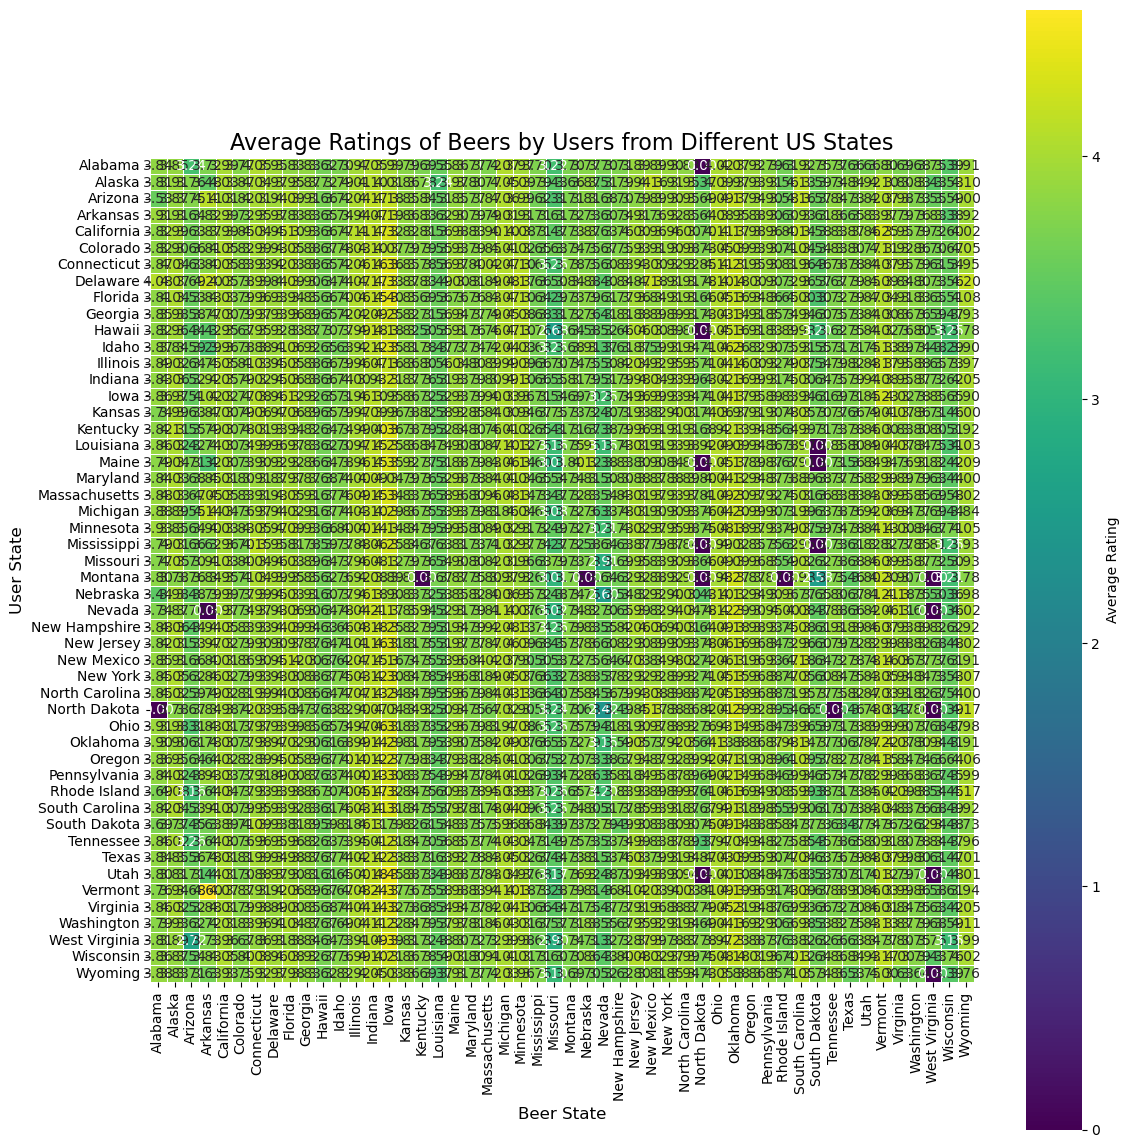

In [ ]:
state_ratings_matrix = state_ratings.pivot_table(index='user_state', columns='beer_state', values='avg', aggfunc='mean', fill_value=0)


plt.figure(figsize=(12, 12))

sns.heatmap(state_ratings_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5, cbar_kws={'label': 'Average Rating'}, square=True)

plt.title('Average Ratings of Beers by Users from Different US States', fontsize=16)
plt.xlabel('Beer State', fontsize=12)
plt.ylabel('User State', fontsize=12)
plt.tight_layout()

plt.show()


There are several problems here: when there are no ratings we need to put Nan not 0.

Below we are comparing the difference between the averages

C:\Users\iaran\AppData\Local\Temp\ipykernel_7648\2908999923.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  other_state_avg_ratings = other_state_ratings.groupby('beer_state').apply(
C:\Users\iaran\AppData\Local\Temp\ipykernel_7648\2908999923.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instea

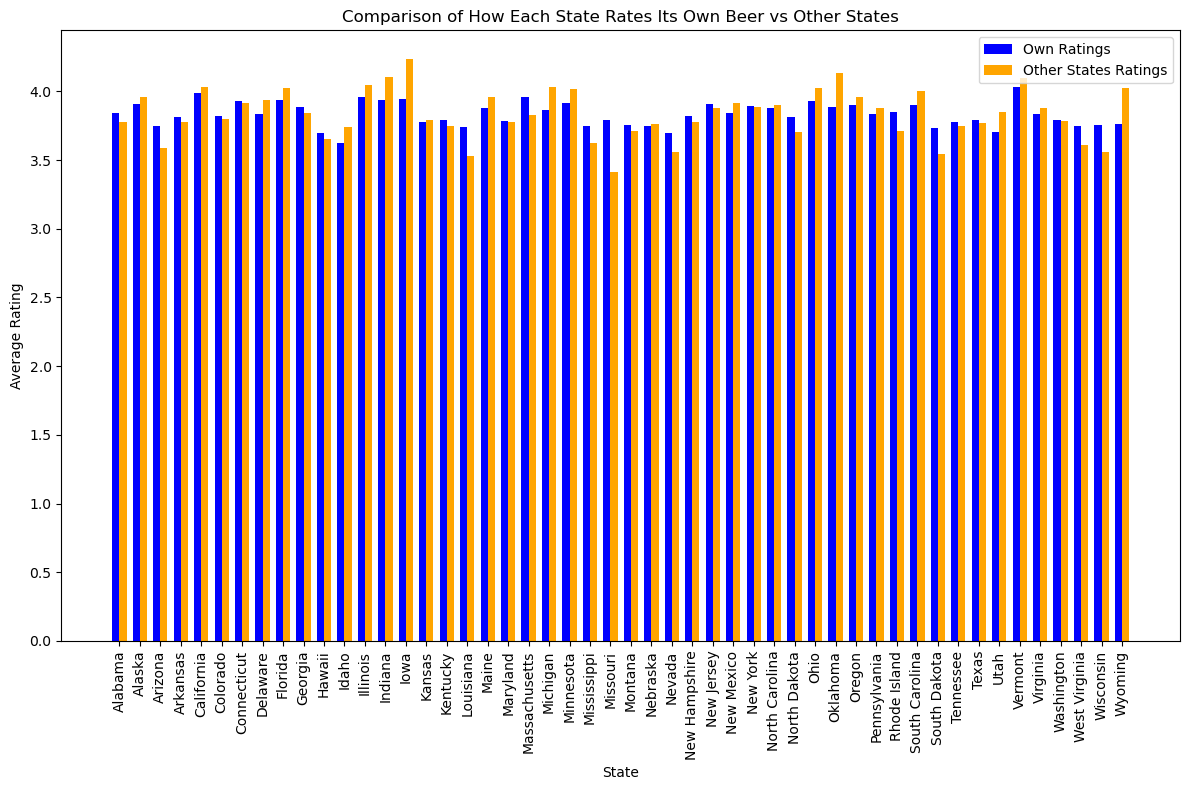

In [ ]:
#average ratings for each state when rating its own beer
own_beer_ratings = US_ratings[US_ratings['user_state'] == US_ratings['beer_state']].groupby('beer_state')['avg'].mean()

#total number of ratings per beer (per beer_state)
total_ratings_per_state = US_ratings.groupby('beer_state').size()

#weighted average rating for each beer by other states
other_state_ratings = US_ratings[US_ratings['user_state'] != US_ratings['beer_state']]
other_state_avg_ratings = other_state_ratings.groupby('beer_state').apply(
    lambda group: np.average(group['rating'], weights=group['user_state'].map(total_ratings_per_state))
)

ratings_comparison = pd.DataFrame({
    'own_beer_avg': own_beer_ratings,
    'other_states_avg': other_state_avg_ratings
})

ratings_comparison['other_states_avg'] = ratings_comparison['other_states_avg'].fillna(0)


plt.figure(figsize=(12, 8))

bar_width = 0.35 
index = np.arange(len(ratings_comparison)) 

plt.bar(index - bar_width / 2, ratings_comparison['own_beer_avg'], bar_width, label='Own Ratings', color='blue')
plt.bar(index + bar_width / 2, ratings_comparison['other_states_avg'], bar_width, label='Other States Ratings', color='orange')

plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Comparison of How Each State Rates Its Own Beer vs Other States')
plt.xticks(index, ratings_comparison.index, rotation=90)
plt.ylim(0,5)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


C:\Users\iaran\AppData\Local\Temp\ipykernel_7648\1233388694.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ratings_comparison['own_beer_avg'][i], ratings_comparison['other_states_avg'][i]],


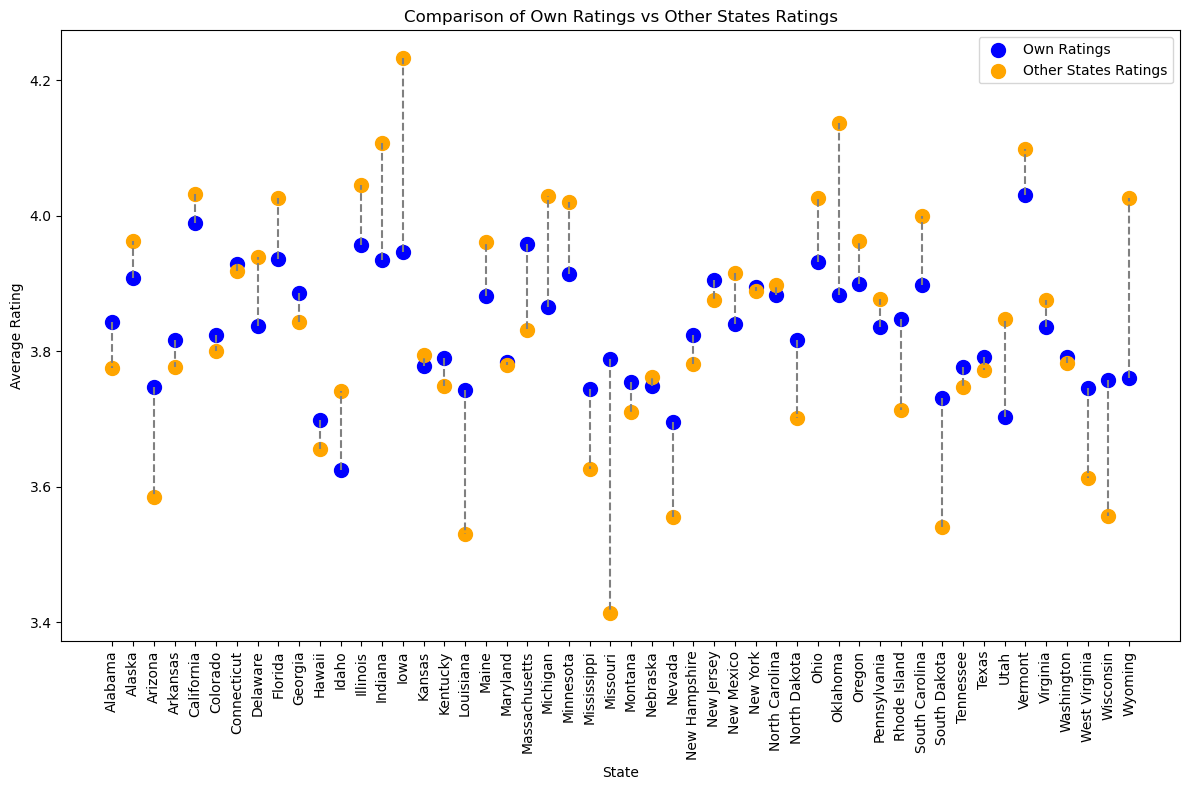

In [ ]:
plt.figure(figsize=(12, 8))

#dots for better visibility
plt.scatter(ratings_comparison.index, ratings_comparison['own_beer_avg'], label='Own Ratings', color='blue', s=100, zorder=2)
plt.scatter(ratings_comparison.index, ratings_comparison['other_states_avg'], label='Other States Ratings', color='orange', s=100, zorder=2)

#lines connecting the dots for visibility
for i in range(len(ratings_comparison)):
    plt.plot([ratings_comparison.index[i], ratings_comparison.index[i]], 
             [ratings_comparison['own_beer_avg'][i], ratings_comparison['other_states_avg'][i]], 
             color='gray', linestyle='--')

plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Comparison of Own Ratings vs Other States Ratings')
plt.xticks(rotation=90)
plt.ylim(0,5)
plt.legend()
plt.tight_layout()

plt.show()


C:\Users\iaran\AppData\Local\Temp\ipykernel_7648\2932709681.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [ratings_comparison['own_beer_avg'][i], ratings_comparison['other_states_avg'][i]],


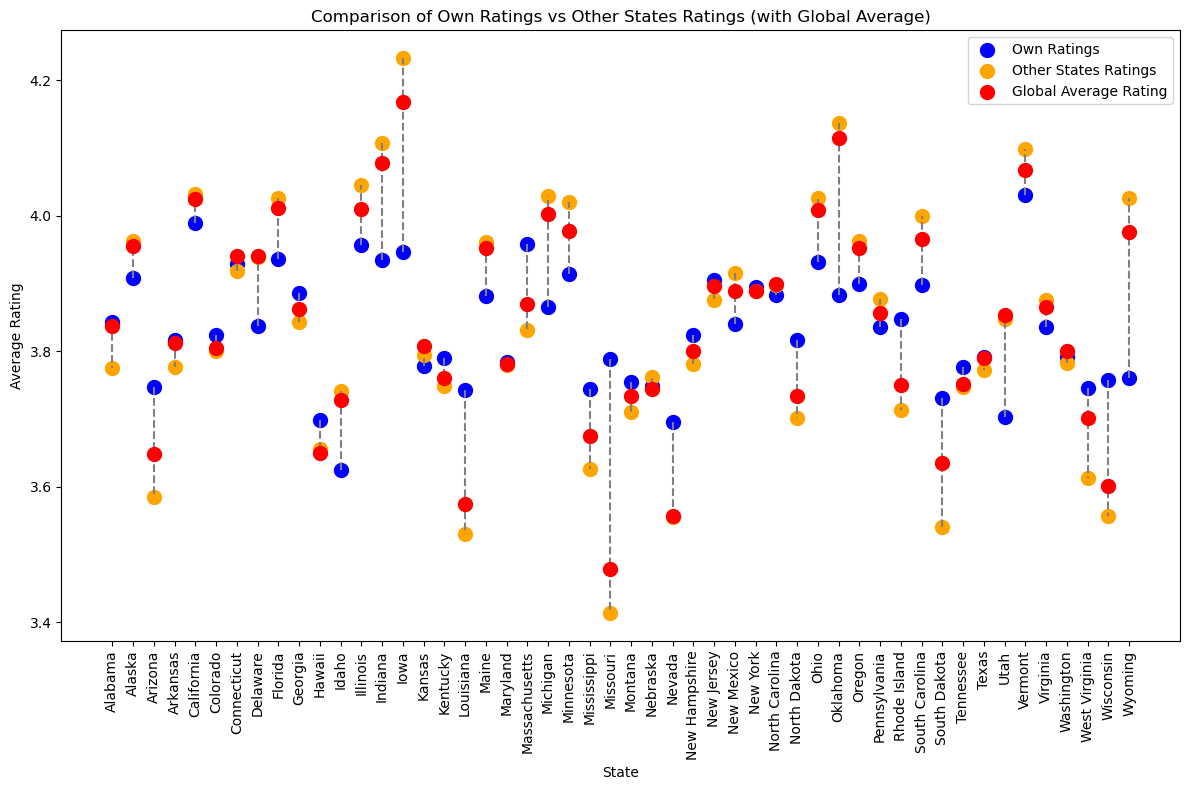

In [ ]:
#global average rating for each state’s beer
global_avg_ratings = US_ratings.groupby('beer_state')['rating'].mean()

plt.figure(figsize=(12, 8))

plt.scatter(ratings_comparison.index, ratings_comparison['own_beer_avg'], label='Own Ratings', color='blue', s=100, zorder=2)
plt.scatter(ratings_comparison.index, ratings_comparison['other_states_avg'], label='Other States Ratings', color='orange', s=100, zorder=2)

plt.scatter(global_avg_ratings.index, global_avg_ratings, label='Global Average Rating', color='red', s=100, zorder=3)

#lines connecting the dots for visibility
for i in range(len(ratings_comparison)):
    plt.plot([ratings_comparison.index[i], ratings_comparison.index[i]], 
             [ratings_comparison['own_beer_avg'][i], ratings_comparison['other_states_avg'][i]], 
             color='gray', linestyle='--')

plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Comparison of Own Ratings vs Other States Ratings (with Global Average)')
plt.xticks(rotation=90)
plt.ylim(0,5)
plt.legend()
plt.tight_layout()

plt.show()


Add a component for the global average
We need to perform statistical tests in order to verify if there is a statistical difference in the way people from a state rank their own beers compared to how other states rank said state. We could take each state independently

Questions we need to answer:

Do Texans rate their own beer higher than other US states rate Texan beer?
Do Texans rate their own beer higher than the global rating of Texan beer?


WHAT TYPE OF TEST DE WE DO?
normality? Independent? High number of numbers

C:\Users\iaran\AppData\Local\Temp\ipykernel_7648\2331213476.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([ratings_comparison['own_beer_avg'][i], ratings_comparison['other_states_avg'][i]],


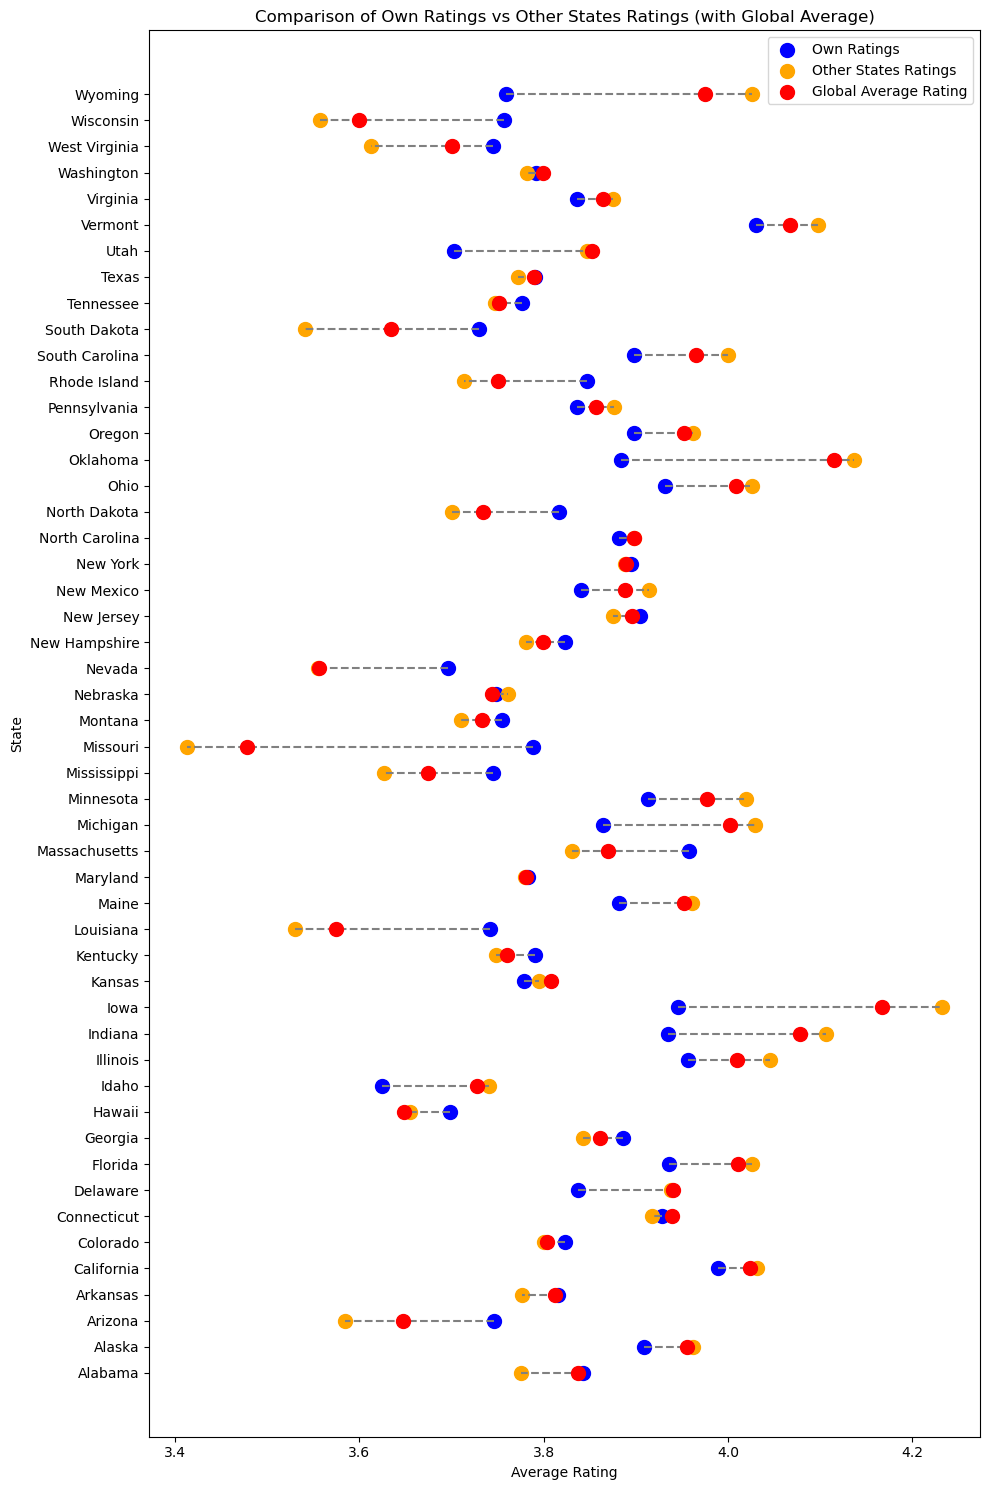

In [ ]:
#global average rating for each state’s beer
global_avg_ratings = US_ratings.groupby('beer_state')['rating'].mean()

plt.figure(figsize=(10, 15))

plt.scatter(ratings_comparison['own_beer_avg'], ratings_comparison.index, label='Own Ratings', color='blue', s=100, zorder=2)
plt.scatter(ratings_comparison['other_states_avg'], ratings_comparison.index, label='Other States Ratings', color='orange', s=100, zorder=2)

plt.scatter(global_avg_ratings, global_avg_ratings.index, label='Global Average Rating', color='red', s=100, zorder=3)

#lines connecting the dots for visibility
for i in range(len(ratings_comparison)):
    plt.plot([ratings_comparison['own_beer_avg'][i], ratings_comparison['other_states_avg'][i]], 
             [ratings_comparison.index[i], ratings_comparison.index[i]], 
             color='gray', linestyle='--')

plt.ylabel('State')
plt.xlabel('Average Rating')
plt.title('Comparison of Own Ratings vs Other States Ratings (with Global Average)')
plt.yticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

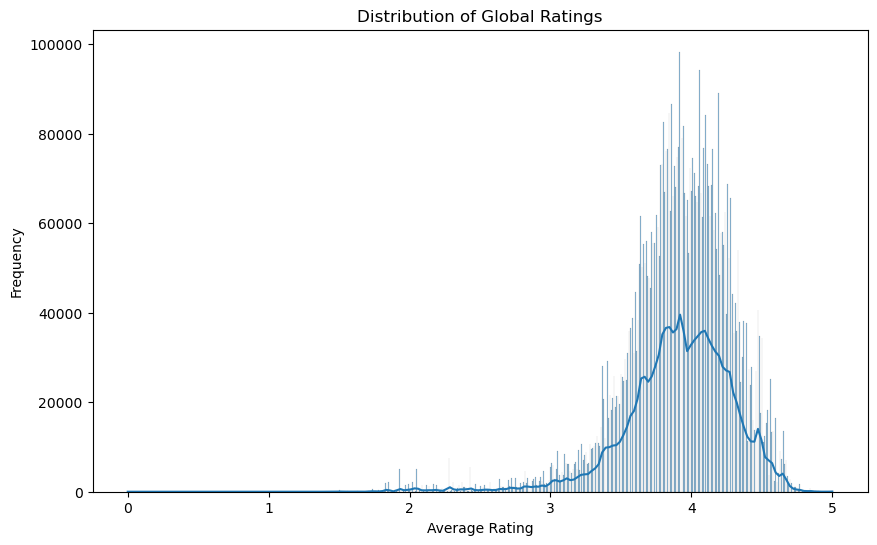

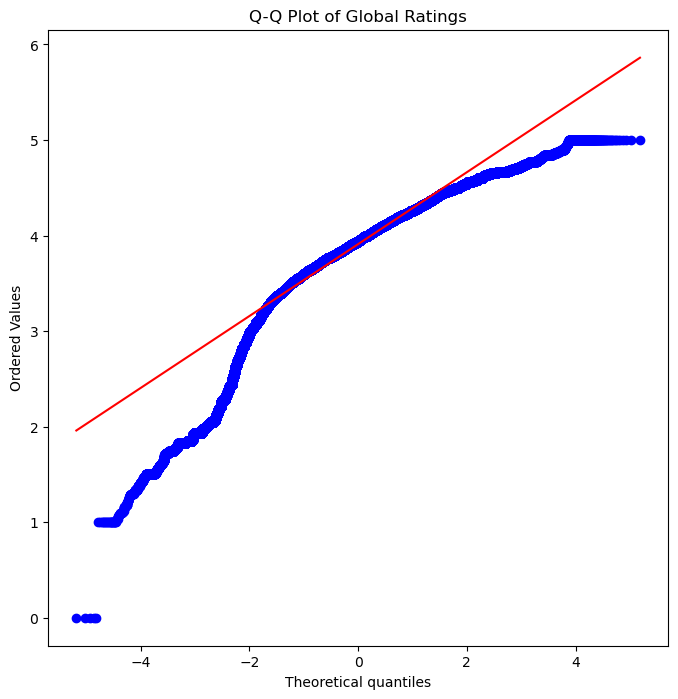

In [ ]:
#histogram of the average ratings
plt.figure(figsize=(10, 6))
sns.histplot(US_ratings['avg'], kde=True)
plt.title("Distribution of Global Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

#Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(US_ratings['avg'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Global Ratings")
plt.show()


Not sure what a Q-Q plt does but it is here

In [42]:
ks_test = stats.kstest(US_ratings['avg'], 'norm', args=(US_ratings['avg'].mean(), US_ratings['avg'].std()))
print("Kolmogorov-Smirnov Test:")
print(f"Statistic={ks_test.statistic}, p-value={ks_test.pvalue}")


Kolmogorov-Smirnov Test:
Statistic=0.06600630121805295, p-value=0.0


OK we can definitively say that this data is not normally distributed!!! p value = 0.0 :(
Below I have proposed a Mann-Whitney U test but I this would work better with small datasets

In [ ]:
#Play around with this and check whether or not there is a difference between X state and all other states

texan_ratings = US_ratings[US_ratings['user_state'] == 'Missouri']['rating']
other_us_ratings = US_ratings[US_ratings['user_state'] != 'Missouri']['rating']

stat, p_value = mannwhitneyu(texan_ratings, other_us_ratings, alternative='greater')

print(f'Mann-Whitney U Statistic: {stat}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("There is a statistically significant difference, and Texan ratings are higher than other US states' ratings.")
else:
    print("There is no statistically significant difference between Texan ratings and other US states' ratings.")


Mann-Whitney U Statistic: 299459343838.5
p-value: 1.0
There is no statistically significant difference between Texan ratings and other US states' ratings.


In [ ]:
missouri_ratings = US_ratings[US_ratings['user_state'] == 'Missouri']['rating']
other_us_ratings = US_ratings[US_ratings['user_state'] != 'Missouri']['rating']

stat, p_value = mannwhitneyu(missouri_ratings, other_us_ratings)

print(f'Mann-Whitney U Statistic: {stat}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("There is a statistically significant difference in the ratings between Missouri and other US states.")
else:
    print("There is no statistically significant difference between Missouri's ratings and other US states' ratings.")


Mann-Whitney U Statistic: 299459343838.5
p-value: 3.6946424714108436e-20
There is a statistically significant difference in the ratings between Missouri and other US states.


             state  state_avg  other_states_avg        p_value  \
39         Vermont   3.997778          3.910803  9.390719e-211   
9       California   3.959886          3.906659   0.000000e+00   
34     Connecticut   3.960312          3.910193  4.470914e-216   
21   Massachusetts   3.955808          3.908713   0.000000e+00   
33   New Hampshire   3.952561          3.910866   1.430152e-73   
24          Alaska   3.948835          3.911335   1.925130e-13   
2         Illinois   3.945108          3.908580   0.000000e+00   
37        Delaware   3.942033          3.911285   2.259230e-19   
40    Rhode Island   3.940795          3.911207   2.256416e-22   
23         Indiana   3.935761          3.910873   1.393223e-95   
0   North Carolina   3.931247          3.910790   1.339891e-34   
16       Minnesota   3.928117          3.910861  7.287434e-106   
8          Arizona   3.928092          3.911247   2.349476e-17   
3         New York   3.922261          3.910630   5.148162e-37   
11        

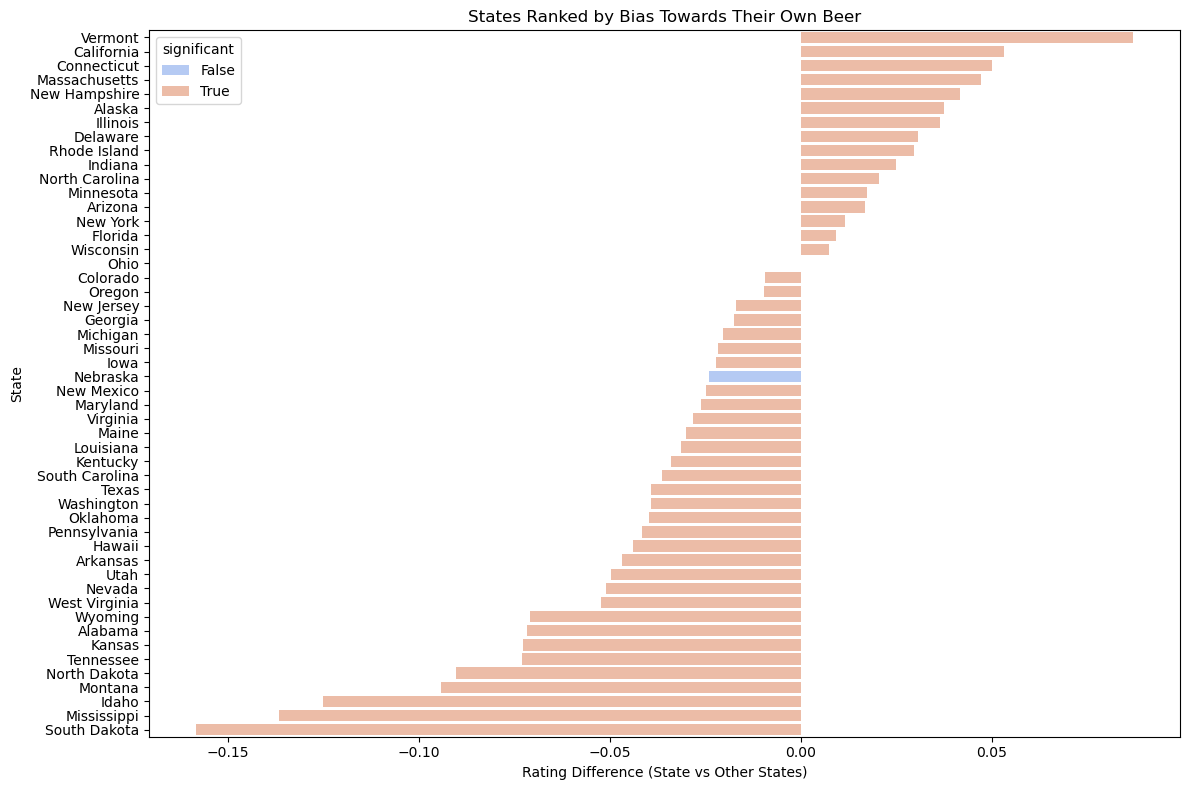

In [ ]:
#calculate Mann-Whitney U and average ratings for each state
def calculate_bias(state, US_ratings):

    state_ratings = US_ratings[US_ratings['user_state'] == state]['rating']
    other_states_ratings = US_ratings[US_ratings['user_state'] != state]['rating']
    
    state_avg = state_ratings.mean()
    other_states_avg = other_states_ratings.mean()
    
    stat, p_value = mannwhitneyu(state_ratings, other_states_ratings)
    
    return state_avg, other_states_avg, p_value


states = US_ratings['user_state'].unique()

bias_results = []

for state in states:
    state_avg, other_states_avg, p_value = calculate_bias(state, US_ratings)
    bias_results.append({
        'state': state,
        'state_avg': state_avg,
        'other_states_avg': other_states_avg,
        'p_value': p_value,
        'rating_difference': state_avg - other_states_avg
    })


bias_df = pd.DataFrame(bias_results)

bias_df['significant'] = bias_df['p_value'] < 0.05


bias_df = bias_df.sort_values(by=['rating_difference', 'significant'], ascending=False)
print(bias_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='rating_difference', y='state', data=bias_df, palette='coolwarm', hue='significant')

plt.xlabel('Rating Difference (State vs Other States)')
plt.ylabel('State')
plt.title('States Ranked by Bias Towards Their Own Beer')
plt.tight_layout()

plt.show()

In the graph the the negative scores is where the state is ranking their beer HIGHER than the US average
This code has a problem!!! We need to plot this but intuitively it makes no sense!!!